In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/kaggle/input/linearregression2/HousePricePrediction.xlsx", engine="openpyxl")

df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [2]:

df.shape

(2919, 13)

In [3]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 6
Float variables: 3


In [4]:

print(df.dtypes)

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object


In [5]:

df_numeric = df.copy()

# Convert categorical columns to numerical using label encoding
for col in df_numeric.select_dtypes(include=['object']).columns:
    df_numeric[col] = df_numeric[col].astype('category').cat.codes

# Now, check if we have numerical data
print(df_numeric.dtypes)
     

Id                int64
MSSubClass        int64
MSZoning           int8
LotArea           int64
LotConfig          int8
BldgType           int8
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st        int8
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object


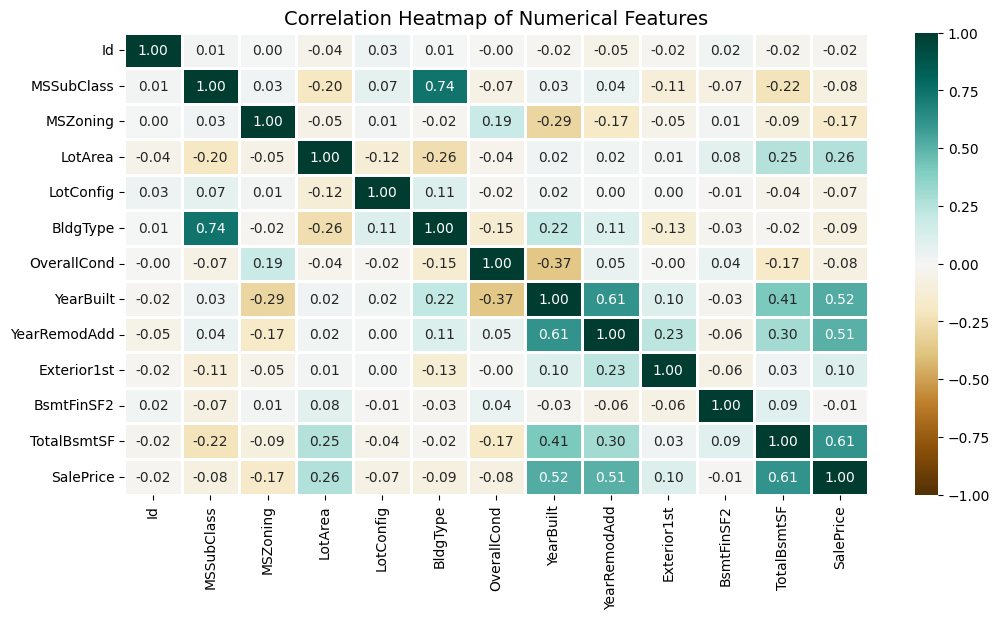

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical features
numerical_df = df_numeric.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numerical_df.corr()

if corr_matrix.empty:
    print("Still no numerical features available. Check your data!")
else:
    plt.figure(figsize=(12, 6))
    sns.heatmap(corr_matrix, cmap='BrBG', fmt='.2f', linewidths=2, annot=True, vmin=-1, vmax=1, annot_kws={"size": 10})
    plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

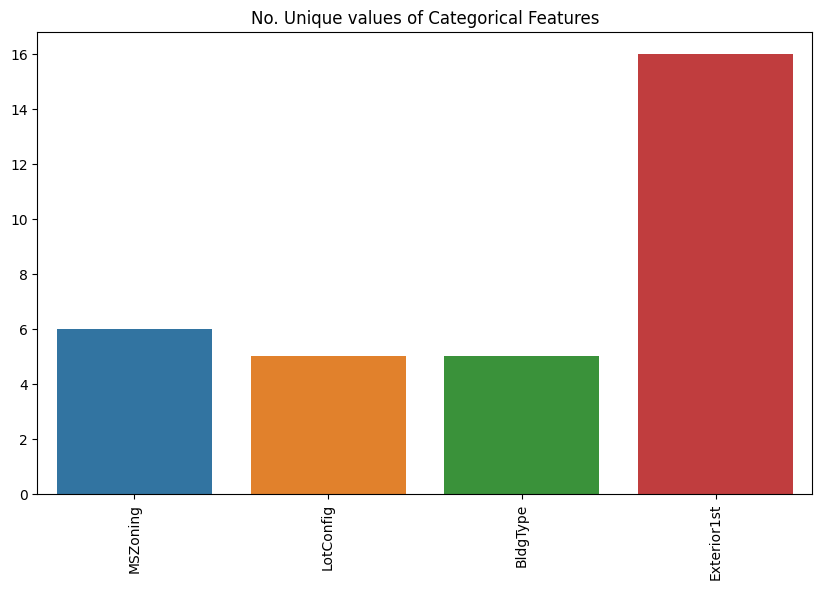

In [8]:

unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

In [10]:

print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')


In [11]:
print(df.isnull().sum())  # Count missing values in each column

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


In [13]:
df.dropna(inplace=True)  # Drop missing rows

In [14]:
X = df.iloc[:, :-1]  # Select all columns except the last one
y = df.iloc[:, -1]   # Select the last column as target
     

In [15]:
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()  # Initialize model
model.fit(X_train, y_train)  # Train model
     

LinearRegression()

In [21]:
y_pred = model.predict(X_test)  # Predict on test data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 34129.49
Mean Squared Error: 2917494855.29
R² Score: 0.62


In [22]:
import joblib
joblib.dump(model, "linear_regression_model.pkl")  # Save model

['linear_regression_model.pkl']